In [2]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [5]:
def mediapipe_detection(image,model):
    image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
    plt.imshow(image)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv.cvtColor(image,cv.COLOR_RGB2BGR)
    plt.imshow(image)
    return image,results

In [5]:
mp_holistic.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [10]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Optional[
        Union[DrawingSpec, Mapping[int, DrawingSpec]]
    ] = DrawingSpec(color=RED_

In [6]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=2),
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=2))
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(120,80,10),thickness=1,circle_radius=2),
                             mp_drawing.DrawingSpec(color=(100,50,121),thickness=1,circle_radius=2))
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(150,22,10),thickness=1,circle_radius=2),
                             mp_drawing.DrawingSpec(color=(120,44,121),thickness=1,circle_radius=2))
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(200,66,10),thickness=1,circle_radius=2),
                             mp_drawing.DrawingSpec(color=(120,117,121),thickness=1,circle_radius=2))

True
<class 'mediapipe.python.solution_base.SolutionOutputs'>


C:\Users\bandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<class 'mediapipe.python.solution_base.SolutionOutputs'>
True
<cl

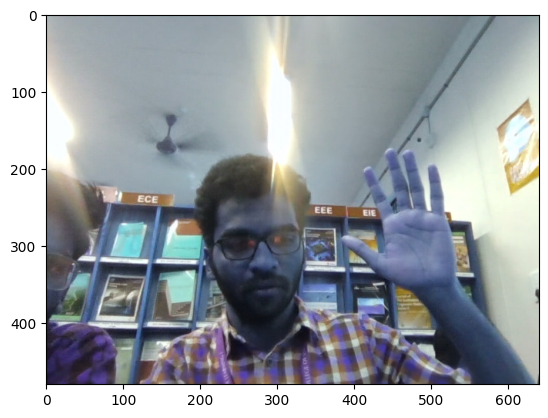

In [21]:
cap = cv.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        print(ret)
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        draw_landmarks(image,results)
        cv.imshow('Sign Lanuage',image)
        if cv.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

In [22]:
draw_landmarks(frame,results)

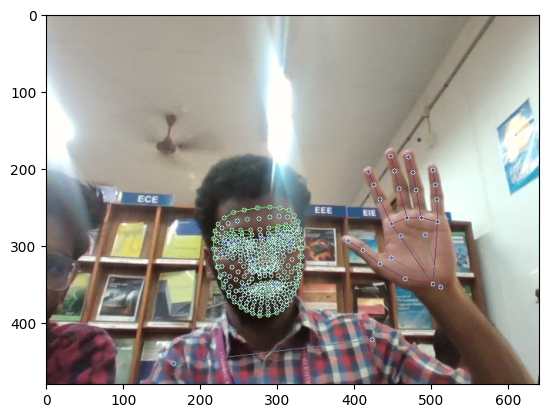

In [23]:
frame = cv.cvtColor(frame,cv.COLOR_RGB2BGR)
plt.imshow(frame)

In [24]:
len(results.face_landmarks.landmark)

468

In [28]:
len(results.left_hand_landmarks.landmark)

21

In [29]:
len(results.face_landmarks.landmark)

468

In [18]:
np.shape(results.face_landmarks.landmark)

(468,)

In [33]:
a = [1,2,3,4,5,6]

In [34]:
a[1]

2

In [35]:
a = [i for i in range(6)]

In [37]:
a

[0, 1, 2, 3, 4, 5]

In [45]:
results.pose_landmarks.landmark

[x: 0.564795077
y: 0.646385431
z: -0.830582321
visibility: 0.999741495
, x: 0.589051604
y: 0.581669033
z: -0.746571183
visibility: 0.99951911
, x: 0.602329373
y: 0.582266808
z: -0.746438384
visibility: 0.9995628
, x: 0.615572214
y: 0.583291
z: -0.746684
visibility: 0.999496
, x: 0.534028053
y: 0.57981658
z: -0.740218937
visibility: 0.999536872
, x: 0.51436615
y: 0.581004322
z: -0.739534497
visibility: 0.999622285
, x: 0.496041059
y: 0.58272326
z: -0.739849925
visibility: 0.999617577
, x: 0.634289563
y: 0.613260388
z: -0.326912224
visibility: 0.999467194
, x: 0.47067219
y: 0.611651182
z: -0.280577034
visibility: 0.999714613
, x: 0.595548451
y: 0.716836572
z: -0.685528874
visibility: 0.99961406
, x: 0.530064642
y: 0.713260472
z: -0.676246643
visibility: 0.999696851
, x: 0.771931648
y: 0.987630546
z: -0.219828799
visibility: 0.992188096
, x: 0.320353627
y: 0.91956389
z: -0.178270072
visibility: 0.996669292
, x: 0.870638072
y: 1.43088961
z: -0.250220954
visibility: 0.069341369
, x: 0.01536

In [2]:
import numpy as np

In [4]:
a = np.array([[1,2,3],[5,6,7]])
a.flatten()

array([1, 2, 3, 5, 6, 7])

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [31]:
extract_keypoints(results)

array([ 0.42009839,  0.67052692, -0.58260745, ...,  0.        ,
        0.        ,  0.        ])

In [32]:
type(os.getcwd())

str

In [18]:
DATA_PATH = os.path.join('MP_DATA')
actions = np.array(['Hello','Thanks','Ily'])
no_sequences = 30
sequence_length = 30

In [56]:
for sequence in range(1):
    print(type(sequence))

<class 'int'>


In [59]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

C:\Users\bandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


KeyboardInterrupt: 

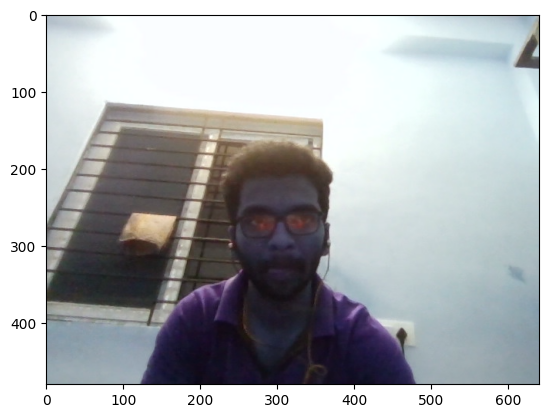

In [60]:
cap = cv.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(0, no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 1, cv.LINE_AA)
                    cv.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv.LINE_AA)
                    # Show to screen
                    cv.imshow('OpenCV Feed', image)
                    cv.waitKey(500)
                else: 
                    cv.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv.LINE_AA)
                    # Show to screen
                    cv.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv.destroyAllWindows()

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
label_map = {label:num for num,label in enumerate(actions)}

In [36]:
label_map

{'hello': 0, 'thanks': 1, 'ily': 2}

In [37]:
sequences,labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
            sequences.append(window)
            labels.append(label_map[action])

In [38]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [39]:
sequences

[[array([ 0.42161506,  0.56785655, -1.33694303, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.42178759,  0.57330567, -1.2808392 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.42533508,  0.57404613, -1.2828151 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.43146738,  0.57400894, -1.28795266, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.44358692,  0.57393831, -1.26802325, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.44441098,  0.56849396, -1.31514859, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.44361767,  0.56386787, -1.38533759, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.43469042,  0.56417495, -1.48382258, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.41985813,  0.5644756 , -1.55002522, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.39196235,  0.56243885, -1.48213077, ...,  0.        ,
       

In [40]:
np.array(sequences).shape

(2700, 30, 1662)

In [41]:
y = to_categorical(labels)

In [42]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [43]:
x = np.array(sequences)

In [44]:
x

array([[[ 0.42161506,  0.56785655, -1.33694303, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.42178759,  0.57330567, -1.2808392 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.42533508,  0.57404613, -1.2828151 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.36949867,  0.57059872, -1.44776773, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.37003121,  0.57054555, -1.43247998, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.37896165,  0.57095492, -1.45607507, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.42161506,  0.56785655, -1.33694303, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.42178759,  0.57330567, -1.2808392 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.42533508,  0.57404613, -1.2828151 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.36949867,  0.57059872, -1.44776773, ...,  

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [46]:
X_train.shape

(2160, 30, 1662)

In [47]:
X_test.shape

(540, 30, 1662)

In [48]:
Y_train.shape

(2160, 3)

In [49]:
Y_test.shape

(540, 3)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [51]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [52]:
X_train[0].shape

(30, 1662)

In [54]:
model = Sequential([
    LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)),
    LSTM(128,return_sequences=True,activation='relu'),
    LSTM(64,return_sequences=False,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(actions.shape[0],activation='softmax')])

In [55]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [56]:
model.fit(X_train,Y_train,epochs=100,callbacks=tb_callback)

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - categorical_accuracy: 0.3805 - loss: 71.4972
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - categorical_accuracy: 0.3433 - loss: 125.3419
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - categorical_accuracy: 0.3999 - loss: 17.9587
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - categorical_accuracy: 0.4988 - loss: 1.0377
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - categorical_accuracy: 0.5225 - loss: 1.0516
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - categorical_accuracy: 0.5332 - loss: 0.9409
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - categorical_accuracy: 0.5919 - loss: 0.8262
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - categorical_accuracy: 0.5685 - loss: 0.8283
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - categorical_accuracy: 0.5917 - loss: 0.7999
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - categorical_accuracy: 0.6150 - loss: 0.7339
Ep

KeyboardInterrupt: 

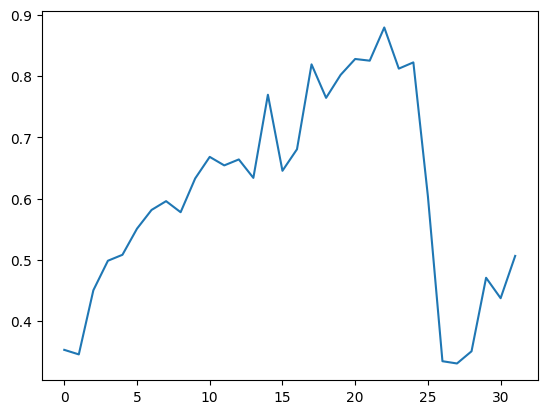

In [57]:
plt.plot(model.history.history['categorical_accuracy'])

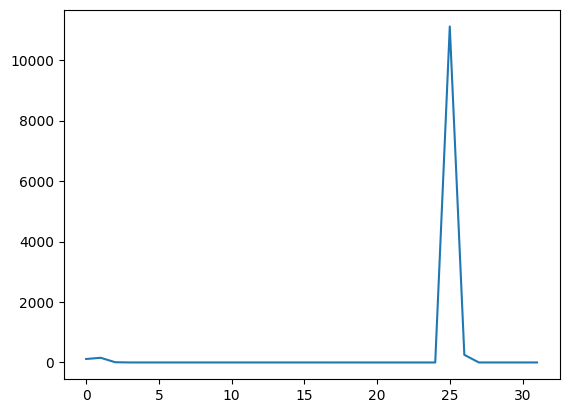

In [58]:
plt.plot(model.history.history['loss'])

In [59]:
y_predicted = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


In [60]:
actions[np.argmax(Y_test[3])]

'hello'

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [62]:
ytrue = np.argmax(Y_test,axis=1).tolist()
yhat= np.argmax(y_predicted,axis=1).tolist()

In [63]:
import seaborn as sns

<Axes: >

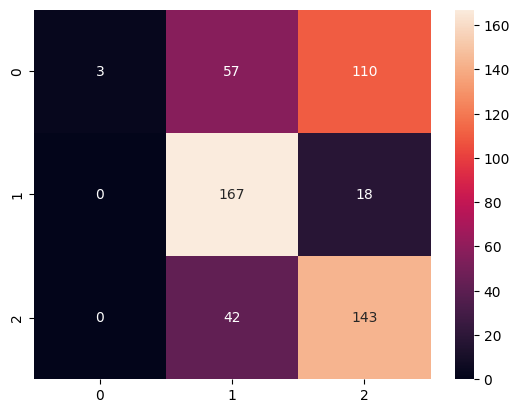

In [64]:
sns.heatmap(confusion_matrix(ytrue,yhat),annot=True,fmt='d')

In [65]:
accuracy_score(ytrue,yhat)

0.5796296296296296

In [14]:
from scipy import stats

In [15]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv.putText(output_frame, actions[num], (0, 85+num*40), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv.LINE_AA)
    return output_frame

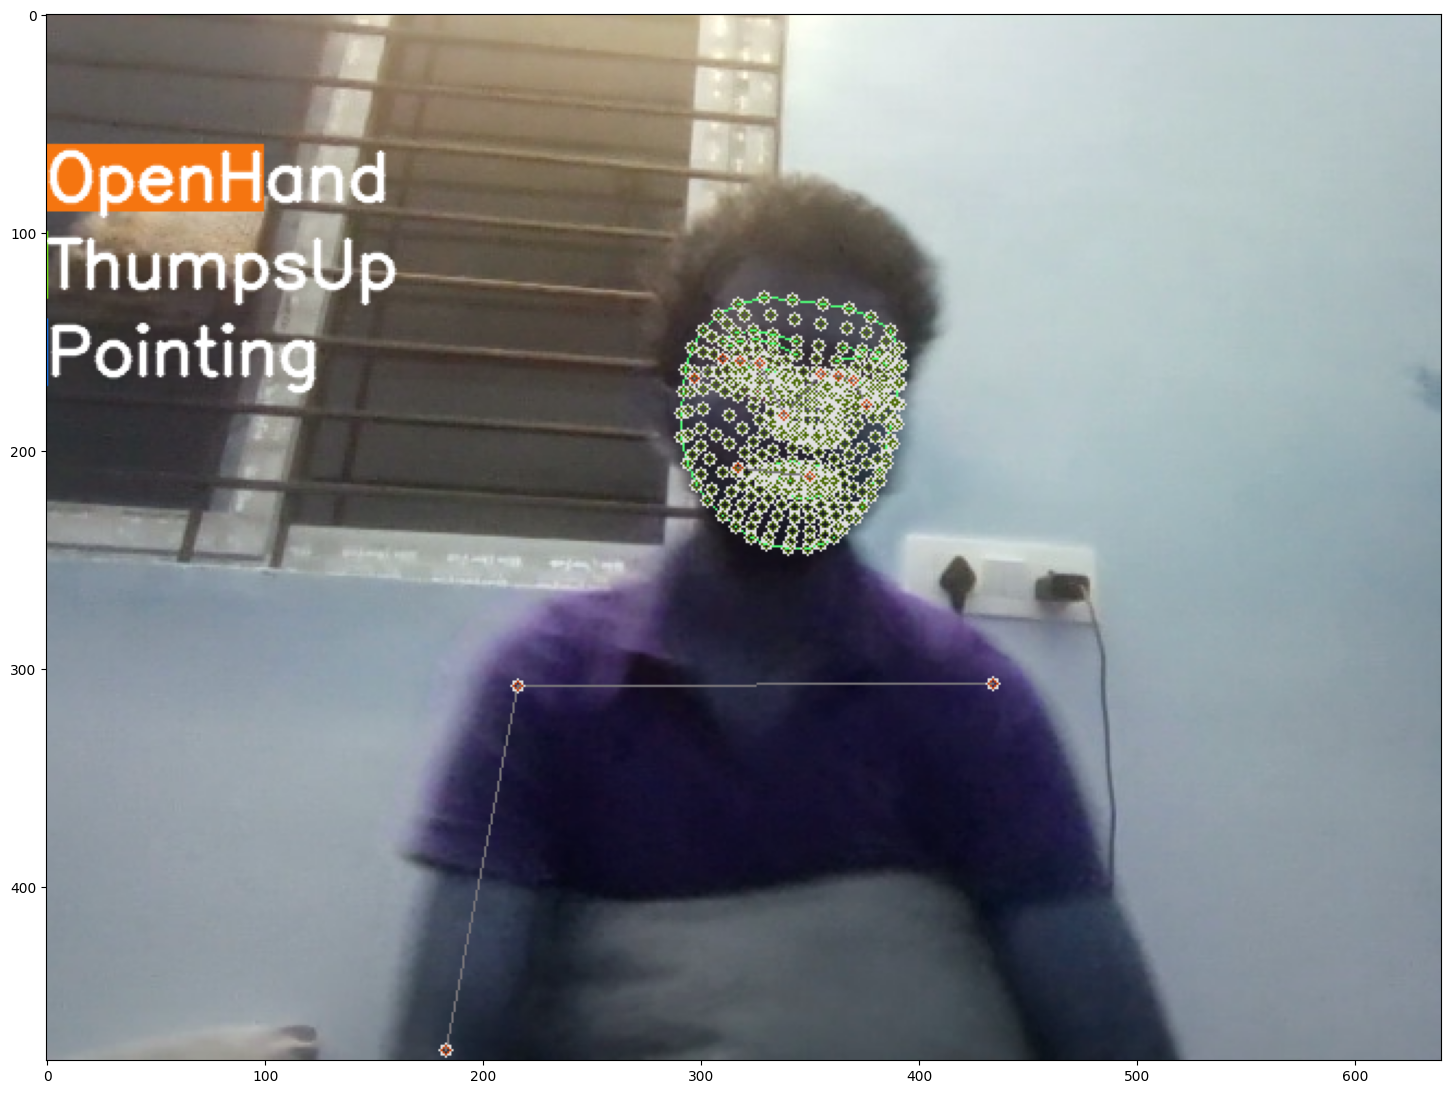

In [16]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [8]:
from tensorflow.keras import models
model = models.load_model('signlangugae.keras')

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv.putText(image, ' '.join(sentence), (3,30), 
                       cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
        
        # Show to screen
        cv.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

In [ ]:
# model.save('signlangugae.keras')